In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_excel("dataset1.xlsx")

In [89]:
df.iloc[:,:6]

,年月,年月日,曜日,開催場,日程,最終Ｒ
0,201611,20161130,水,23# 唐 津,第 ４日,優勝戦
1,201611,20161130,水,23# 唐 津,第 ４日,優勝戦
2,201611,20161129,火,23# 唐 津,第 ３日,準優勝戦
3,201611,20161129,火,23# 唐 津,第 ３日,準優勝戦
4,201611,20161128,月,23# 唐 津,第 ２日,予選・他
5,201611,20161128,月,23# 唐 津,第 ２日,予選・他
6,201611,20161127,日,23# 唐 津,第 １日,予選・他
7,201611,20161127,日,23# 唐 津,第 １日,予選・他
8,201611,20161120,日,10# 三 国,第 ４日,優勝戦
9,201611,20161120,日,10# 三 国,第 ４日,優勝戦


In [4]:
weather_replacement = {"晴" : 2, "雲" : 1, "雨" : 0}

In [5]:
df = df.replace(weather_replacement)

## 訓練データ前処理
データ構造 : `[雨, 曇り, 晴れ, 風速, 波]`

Example:
曇りで風速8, 波3のときは`[0, 1, 0, 8, 3]`という内容になる

In [6]:
x_train = np.array(df.loc[:, "天気":"波"], dtype = "int8")
x_train_temp = np.empty((x_train.shape[0], 5), dtype="int8")

for i in range( x_train.shape[0] ):
    index = x_train[ i , 0 ]
    temp_array = np.zeros(3)
    temp_array[ index - 1] = 1
    x_train_temp[i] = np.concatenate([temp_array, x_train[i, 1: ]])
x_train = x_train_temp

## 教師データ前処理
データ構造: `[一位, 二位, ..., 六位]`

Example: 4位だった時, `[0, 0, 0, 1, 0, 0]`となる.

In [7]:
y_train = np.array( df.loc[:, "着順"])
y_train_temp = np.empty((y_train.shape[0], y_train.max()))
for i in range(y_train.shape[0]):
    index = y_train[i]
    temp_array = np.zeros(y_train.max())
    temp_array[ index - 1] = 1
    y_train_temp[i] = temp_array
y_train = y_train_temp

## NN初期化
- 最適化: RMSProp
- 誤差関数: 多クラス交差エントロピー関数
- 繰り返し回数: 100
- バッチサイズ: 24

In [83]:
optimizer = "rmsprop"
loss = keras.losses.categorical_crossentropy
epochs = 500
batch_size = 24

model = Sequential()
model.add( Dense(12, activation = 'relu', input_dim = 5) )
model.add( Dense(6, activation = 'softmax') )
model.compile(optimizer = optimizer,loss = loss, metrics = ['accuracy'])

## 構成

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 12)                72        
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 78        
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


## 学習

In [91]:
model.fit(x_train, y_train,
          epochs = epochs,
          batch_size = batch_size,
          validation_data = (x_train, y_train)
)

Train on 573 samples, validate on 573 samples
Epoch 1/500
573/573 [==============================] - 0s 116us/step - loss: 1.6817 - acc: 0.3089 - val_loss: 1.6763 - val_acc: 0.3019
Epoch 2/500
573/573 [==============================] - 0s 105us/step - loss: 1.6804 - acc: 0.3037 - val_loss: 1.6767 - val_acc: 0.3089
Epoch 3/500
573/573 [==============================] - 0s 98us/step - loss: 1.6815 - acc: 0.2967 - val_loss: 1.6764 - val_acc: 0.3002
Epoch 4/500
573/573 [==============================] - 0s 183us/step - loss: 1.6809 - acc: 0.3054 - val_loss: 1.6767 - val_acc: 0.2967
Epoch 5/500
573/573 [==============================] - 0s 131us/step - loss: 1.6817 - acc: 0.3072 - val_loss: 1.6763 - val_acc: 0.2984
Epoch 6/500
573/573 [==============================] - 0s 105us/step - loss: 1.6807 - acc: 0.3019 - val_loss: 1.6764 - val_acc: 0.3124
Epoch 7/500
573/573 [==============================] - 0s 116us/step - loss: 1.6810 - acc: 0.3019 - val_loss: 1.6763 - val_acc: 0.3106
Epoch 8/50

573/573 [==============================] - 0s 112us/step - loss: 1.6803 - acc: 0.3054 - val_loss: 1.6759 - val_acc: 0.3002
Epoch 62/500
573/573 [==============================] - 0s 83us/step - loss: 1.6802 - acc: 0.3019 - val_loss: 1.6757 - val_acc: 0.3019
Epoch 63/500
573/573 [==============================] - 0s 86us/step - loss: 1.6805 - acc: 0.3037 - val_loss: 1.6758 - val_acc: 0.3019
Epoch 64/500
573/573 [==============================] - 0s 123us/step - loss: 1.6809 - acc: 0.2984 - val_loss: 1.6758 - val_acc: 0.3019
Epoch 65/500
573/573 [==============================] - 0s 187us/step - loss: 1.6797 - acc: 0.2949 - val_loss: 1.6761 - val_acc: 0.3124
Epoch 66/500
573/573 [==============================] - 0s 126us/step - loss: 1.6809 - acc: 0.3019 - val_loss: 1.6757 - val_acc: 0.3019
Epoch 67/500
573/573 [==============================] - 0s 124us/step - loss: 1.6804 - acc: 0.3089 - val_loss: 1.6758 - val_acc: 0.3141
Epoch 68/500
573/573 [==============================] - 0s 162u

573/573 [==============================] - 0s 164us/step - loss: 1.6805 - acc: 0.3054 - val_loss: 1.6752 - val_acc: 0.3019
Epoch 122/500
573/573 [==============================] - 0s 113us/step - loss: 1.6805 - acc: 0.3037 - val_loss: 1.6752 - val_acc: 0.3019
Epoch 123/500
573/573 [==============================] - 0s 100us/step - loss: 1.6807 - acc: 0.3019 - val_loss: 1.6752 - val_acc: 0.3159
Epoch 124/500
573/573 [==============================] - 0s 134us/step - loss: 1.6803 - acc: 0.2967 - val_loss: 1.6751 - val_acc: 0.3141
Epoch 125/500
573/573 [==============================] - 0s 104us/step - loss: 1.6800 - acc: 0.3089 - val_loss: 1.6752 - val_acc: 0.3002
Epoch 126/500
573/573 [==============================] - 0s 101us/step - loss: 1.6803 - acc: 0.3002 - val_loss: 1.6753 - val_acc: 0.3019
Epoch 127/500
573/573 [==============================] - 0s 99us/step - loss: 1.6806 - acc: 0.2984 - val_loss: 1.6753 - val_acc: 0.3124
Epoch 128/500
573/573 [==============================] -

Epoch 181/500
573/573 [==============================] - 0s 143us/step - loss: 1.6801 - acc: 0.3037 - val_loss: 1.6751 - val_acc: 0.3124
Epoch 182/500
573/573 [==============================] - 0s 134us/step - loss: 1.6804 - acc: 0.2932 - val_loss: 1.6749 - val_acc: 0.3141
Epoch 183/500
573/573 [==============================] - 0s 125us/step - loss: 1.6788 - acc: 0.3141 - val_loss: 1.6757 - val_acc: 0.2967
Epoch 184/500
573/573 [==============================] - 0s 114us/step - loss: 1.6808 - acc: 0.3002 - val_loss: 1.6750 - val_acc: 0.3124
Epoch 185/500
573/573 [==============================] - 0s 108us/step - loss: 1.6798 - acc: 0.3019 - val_loss: 1.6751 - val_acc: 0.3124
Epoch 186/500
573/573 [==============================] - 0s 144us/step - loss: 1.6804 - acc: 0.3019 - val_loss: 1.6749 - val_acc: 0.3124
Epoch 187/500
573/573 [==============================] - 0s 119us/step - loss: 1.6795 - acc: 0.3002 - val_loss: 1.6751 - val_acc: 0.3002
Epoch 188/500
573/573 [==================

Epoch 241/500
573/573 [==============================] - 0s 153us/step - loss: 1.6796 - acc: 0.2949 - val_loss: 1.6744 - val_acc: 0.3159
Epoch 242/500
573/573 [==============================] - 0s 134us/step - loss: 1.6795 - acc: 0.2984 - val_loss: 1.6744 - val_acc: 0.3141
Epoch 243/500
573/573 [==============================] - 0s 132us/step - loss: 1.6796 - acc: 0.2949 - val_loss: 1.6743 - val_acc: 0.3141
Epoch 244/500
573/573 [==============================] - 0s 148us/step - loss: 1.6793 - acc: 0.2932 - val_loss: 1.6745 - val_acc: 0.3159
Epoch 245/500
573/573 [==============================] - 0s 121us/step - loss: 1.6796 - acc: 0.3002 - val_loss: 1.6742 - val_acc: 0.3141
Epoch 246/500
573/573 [==============================] - 0s 117us/step - loss: 1.6785 - acc: 0.3159 - val_loss: 1.6748 - val_acc: 0.2984
Epoch 247/500
573/573 [==============================] - 0s 147us/step - loss: 1.6793 - acc: 0.3037 - val_loss: 1.6747 - val_acc: 0.2967
Epoch 248/500
573/573 [==================

Epoch 301/500
573/573 [==============================] - 0s 140us/step - loss: 1.6785 - acc: 0.2914 - val_loss: 1.6741 - val_acc: 0.3159
Epoch 302/500
573/573 [==============================] - 0s 180us/step - loss: 1.6794 - acc: 0.3159 - val_loss: 1.6739 - val_acc: 0.3019
Epoch 303/500
573/573 [==============================] - 0s 142us/step - loss: 1.6798 - acc: 0.3124 - val_loss: 1.6739 - val_acc: 0.3019
Epoch 304/500
573/573 [==============================] - 0s 188us/step - loss: 1.6787 - acc: 0.2932 - val_loss: 1.6739 - val_acc: 0.3019
Epoch 305/500
573/573 [==============================] - 0s 213us/step - loss: 1.6787 - acc: 0.3019 - val_loss: 1.6738 - val_acc: 0.3019
Epoch 306/500
573/573 [==============================] - 0s 160us/step - loss: 1.6790 - acc: 0.3089 - val_loss: 1.6738 - val_acc: 0.3019
Epoch 307/500
573/573 [==============================] - 0s 222us/step - loss: 1.6789 - acc: 0.3037 - val_loss: 1.6738 - val_acc: 0.3019
Epoch 308/500
573/573 [==================

Epoch 361/500
573/573 [==============================] - 0s 174us/step - loss: 1.6777 - acc: 0.3054 - val_loss: 1.6736 - val_acc: 0.3141
Epoch 362/500
573/573 [==============================] - 0s 175us/step - loss: 1.6783 - acc: 0.3037 - val_loss: 1.6735 - val_acc: 0.3141
Epoch 363/500
573/573 [==============================] - 0s 176us/step - loss: 1.6793 - acc: 0.3176 - val_loss: 1.6734 - val_acc: 0.3019
Epoch 364/500
573/573 [==============================] - 0s 218us/step - loss: 1.6785 - acc: 0.3072 - val_loss: 1.6738 - val_acc: 0.3019
Epoch 365/500
573/573 [==============================] - 0s 216us/step - loss: 1.6787 - acc: 0.3054 - val_loss: 1.6736 - val_acc: 0.3019
Epoch 366/500
573/573 [==============================] - 0s 192us/step - loss: 1.6785 - acc: 0.2914 - val_loss: 1.6737 - val_acc: 0.3002
Epoch 367/500
573/573 [==============================] - 0s 212us/step - loss: 1.6795 - acc: 0.3037 - val_loss: 1.6734 - val_acc: 0.3019
Epoch 368/500
573/573 [==================

Epoch 421/500
573/573 [==============================] - 0s 163us/step - loss: 1.6786 - acc: 0.3002 - val_loss: 1.6732 - val_acc: 0.3019
Epoch 422/500
573/573 [==============================] - 0s 154us/step - loss: 1.6780 - acc: 0.2949 - val_loss: 1.6733 - val_acc: 0.3002
Epoch 423/500
573/573 [==============================] - 0s 206us/step - loss: 1.6784 - acc: 0.3037 - val_loss: 1.6732 - val_acc: 0.3019
Epoch 424/500
573/573 [==============================] - 0s 208us/step - loss: 1.6785 - acc: 0.2932 - val_loss: 1.6731 - val_acc: 0.3002
Epoch 425/500
573/573 [==============================] - 0s 182us/step - loss: 1.6779 - acc: 0.2949 - val_loss: 1.6730 - val_acc: 0.3019
Epoch 426/500
573/573 [==============================] - 0s 202us/step - loss: 1.6781 - acc: 0.3089 - val_loss: 1.6730 - val_acc: 0.3141
Epoch 427/500
573/573 [==============================] - 0s 148us/step - loss: 1.6788 - acc: 0.2967 - val_loss: 1.6731 - val_acc: 0.3141
Epoch 428/500
573/573 [==================

Epoch 481/500
573/573 [==============================] - 0s 239us/step - loss: 1.6775 - acc: 0.2967 - val_loss: 1.6732 - val_acc: 0.2984
Epoch 482/500
573/573 [==============================] - 0s 169us/step - loss: 1.6780 - acc: 0.3019 - val_loss: 1.6727 - val_acc: 0.3141
Epoch 483/500
573/573 [==============================] - 0s 194us/step - loss: 1.6782 - acc: 0.2984 - val_loss: 1.6726 - val_acc: 0.3141
Epoch 484/500
573/573 [==============================] - 0s 164us/step - loss: 1.6779 - acc: 0.2984 - val_loss: 1.6727 - val_acc: 0.3141
Epoch 485/500
573/573 [==============================] - 0s 156us/step - loss: 1.6775 - acc: 0.2949 - val_loss: 1.6729 - val_acc: 0.3002
Epoch 486/500
573/573 [==============================] - 0s 172us/step - loss: 1.6775 - acc: 0.2949 - val_loss: 1.6726 - val_acc: 0.3124
Epoch 487/500
573/573 [==============================] - 0s 163us/step - loss: 1.6776 - acc: 0.3019 - val_loss: 1.6731 - val_acc: 0.3124
Epoch 488/500
573/573 [==================

## 予測
`is_rain`, `is_cloudy`, `is_sunny`, `wind_speed`, `wave_height`の数値を学習済みNNに代入する

出力される数値は左から1位~6位になる確率を返していると見なせる.

[[0.3727216  0.25284725 0.01441067 0.12873901 0.09335055 0.13793081]]


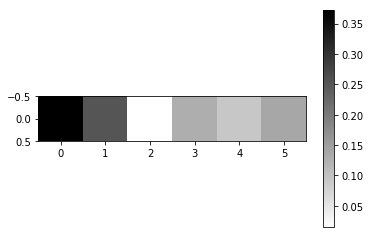

In [95]:
# Input params
is_rain = 0
is_cloudy = 0
is_sunny = 1
wind_speed = 3
wave_height = 5

# prediction
input_data = np.array([[is_rain, is_cloudy, is_sunny, wind_speed, wave_height]])
predict_data = model.predict(input_data)
print(predict_data)

# image
plt.imshow(predict_data, cmap = plt.cm.binary)
plt.colorbar()